42.46. Create a regression model
42.46.1. Instructions

In this section you were shown how to build a model using both Linear and Polynomial Regression. Using this knowledge, find a dataset or use one of Scikit-learn’s built-in sets to build a fresh model. Explain in your notebook why you chose the technique you did, and demonstrate your model’s accuracy. If it is not accurate, explain why.
在本节中，我们向你展示了如何使用线性和多项式回归建立模型。利用这些知识，找到一个数据集或使用Scikit-learn的一个内置集来建立一个新的模型。在你的笔记本上解释你为什么选择这种技术，并证明你的模型的准确性。如果它不准确，请解释原因。

鸢尾花数据集的目标是对花的种类进行区分，属于分类问题，而逻辑回归输出离散值，解决的是分类问题，因此选择逻辑回归模型。

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)

path = 'iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
data[4] = pd.Categorical(data[4]).codes
x, y = np.split(data.values, (4,), axis=1)
# 使用前两列特征
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
               ('poly', PolynomialFeatures(degree=2)),
               ('clf', LogisticRegression()) ])
lr.fit(x, y.ravel())
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
# print('y_hat = \n', y_hat)
# print('y_hat_prob = \n', y_hat_prob)
print(u'准确度：%.2f%%' % (100*np.mean(y_hat == y.ravel())))


准确度：81.33%


/Users/zhangzheran/opt/anaconda3/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/Users/zhangzheran/opt/anaconda3/envs/unet/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


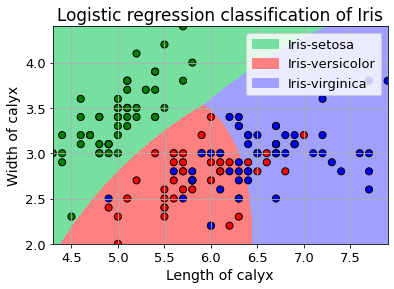

In [2]:
# 画图
N, M = 500, 500
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)
x_test = np.stack((x1.flat, x2.flat), axis=1)

# mpl.rcParams['font.sans-serif'] = [u'simHei']
# mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)
y_hat = y_hat.reshape(x1.shape)
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)
plt.xlabel(u'Length of calyx', fontsize=14)
plt.ylabel(u'Width of calyx', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
patchs = [mpatches.Patch(color='#77E0A0', label='Iris-setosa'),
          mpatches.Patch(color='#FF8080', label='Iris-versicolor'),
          mpatches.Patch(color='#A0A0FF', label='Iris-virginica')]
plt.legend(handles=patchs, fancybox=True, framealpha=0.8)
plt.title(u'Logistic regression classification of Iris', fontsize=17)
plt.show()